In [1]:
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np
np.set_printoptions(suppress=True)
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Any, Union
import pickle

In [2]:
IN_CSV_DATA = Path().cwd().parent.parent / "data/4_data_split"
IN_MODEL_DATA = Path().cwd().parent.parent / "data/5_models"

In [3]:
df_train = pd.read_csv(IN_CSV_DATA/'prepared_train.csv')
df_test = pd.read_csv(IN_CSV_DATA/'prepared_test.csv')

In [4]:
numerical_feature_cols = ['total_distance_mi','total_weight_lbs','avg_cruising_speed', 'log_hours_since_last_ride',
                            'active_time_ratio', 'avg_climb_rate', 'distance_training_intensity','prior_training_load']
categorical_feature_cols = []#['year']
feature_cols = numerical_feature_cols + categorical_feature_cols

target_cols = ['best_power_4s', 'best_power_5s',
                'best_power_10s', 'best_power_20s', 'best_power_30s', 'best_power_1m',
                'best_power_2m', 'best_power_3m', 'best_power_4m', 'best_power_5m',
                'best_power_6m', 'best_power_10m', 'best_power_20m', 'best_power_30m',
                'best_power_40m', 'best_power_1h', 'best_power_2h']

In [5]:
X_train, y_train = df_train[feature_cols].values, df_train[target_cols].values
X_test, y_test = df_test[feature_cols].values, df_test[target_cols].values

In [6]:
from sklearn.metrics import r2_score, root_mean_squared_log_error

In [16]:
def compare_model_training_to_testing(model, X_train, y_train, X_test, y_test):
    ################################# TRAINING
    y_pred_train = model.predict(X_train)
    y_pred_train[y_pred_train<0] = 0.0

    r2_train = r2_score(y_train, y_pred_train, multioutput='raw_values')
    # intentionally swapped so we accept underestimations of power curve
    rmsle_train = root_mean_squared_log_error(y_pred_train, y_train, multioutput='raw_values') 

    ################################# TEST
    y_pred_test = model.predict(X_test)
    y_pred_test[y_pred_test<0] = 0.0

    r2_test = r2_score(y_test, y_pred_test, multioutput='raw_values') 
    # intentionally swapped so we accept underestimations of power curve
    rmsle_test = root_mean_squared_log_error(y_pred_test, y_test, multioutput='raw_values') 

    fig, axes = plt.subplots(1,2, figsize=(12,5),)
    axes[0].plot(r2_train, 'b', marker='o', label=f'train set: avg. $R^2={np.mean(r2_train):0.2f}$')
    axes[0].plot(r2_test, 'r', marker='s', label=f'test set: avg. $R^2={np.mean(r2_test):0.2f}$')
    axes[0].set_xticks(ticks=range(len(target_cols)), labels=[y.split('_')[-1] for y in target_cols], rotation=90-15)
    axes[0].legend(loc='best')
    axes[0].grid()
    axes[0].set_axisbelow(True)
    axes[0].set_xlabel('Target: Best Effort for Duration', fontsize=14)
    axes[0].set_ylabel('$R^2$ Score', fontsize=14)

    axes[1].plot(rmsle_train, 'b', marker='o', label=f'train set: avg. $RMSLE={np.mean(rmsle_train):0.2f}$')
    axes[1].plot(rmsle_test, 'r', marker='s', label=f'test set: avg. $RMSLE={np.mean(rmsle_test):0.2f}$')
    axes[1].set_xticks(ticks=range(len(target_cols)), labels=[y.split('_')[-1] for y in target_cols], rotation=90-15)
    axes[1].legend(loc='best')
    axes[1].grid()
    axes[1].set_axisbelow(True)
    axes[1].set_xlabel('Target: Best Effort for Duration', fontsize=14)
    axes[1].set_ylabel('$RMSLE$ Score', fontsize=14)

# 1. Linear Regression

In [8]:
model = pickle.load(open(IN_MODEL_DATA / 'linear_reg_AllAtOnce.pkl','rb'))

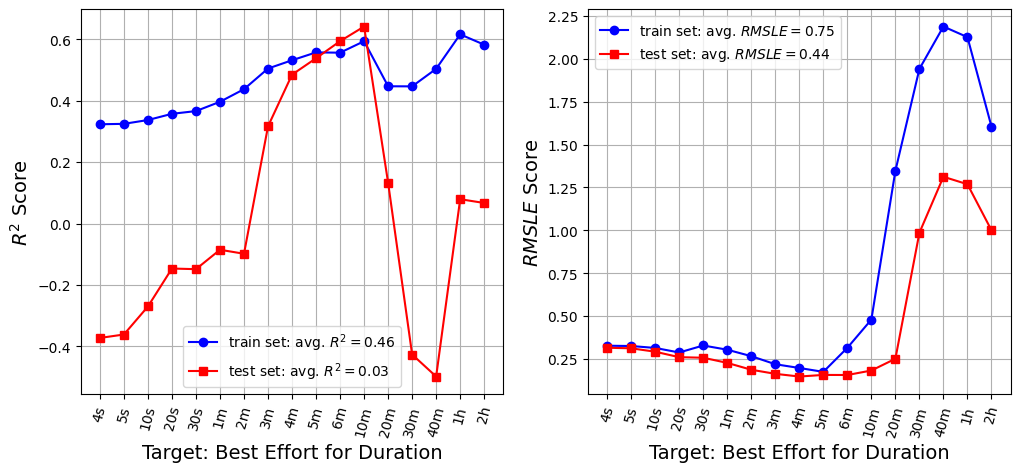

In [17]:
compare_model_training_to_testing(model, X_train, y_train, X_test, y_test)

# 2. Lasso Regression

In [18]:
model = pickle.load(open(IN_MODEL_DATA / 'lasso_reg_AllAtOnce.pkl','rb'))
model_MO = pickle.load(open(IN_MODEL_DATA / 'lasso_reg_MultiOutput.pkl','rb'))
model_RC = pickle.load(open(IN_MODEL_DATA / 'lasso_reg_RegChain.pkl','rb'))

In [ ]:
compare_model_training_to_testing(model, X_train, y_train, X_test, y_test)

In [ ]:
compare_model_training_to_testing(model_MO, X_train, y_train, X_test, y_test)

In [ ]:
compare_model_training_to_testing(model_RC, X_train, y_train, X_test, y_test)

# 3. Kernel Ridge Regression

In [ ]:
model = pickle.load(open(IN_MODEL_DATA / 'kridge_reg_AllAtOnce.pkl','rb'))
model_MO = pickle.load(open(IN_MODEL_DATA / 'kridge_reg_MultiOutput.pkl','rb'))
model_RC = pickle.load(open(IN_MODEL_DATA / 'kridge_reg_RegChain.pkl','rb'))

In [ ]:
compare_model_training_to_testing(model, X_train, y_train, X_test, y_test)

In [ ]:
compare_model_training_to_testing(model_MO, X_train, y_train, X_test, y_test)

In [ ]:
compare_model_training_to_testing(model_RC, X_train, y_train, X_test, y_test)

# 4. K-NN Regression

In [ ]:
model = pickle.load(open(IN_MODEL_DATA / 'knn_reg_AllAtOnce.pkl','rb'))
model_MO = pickle.load(open(IN_MODEL_DATA / 'knn_reg_MultiOutput.pkl','rb'))
model_RC = pickle.load(open(IN_MODEL_DATA / 'knn_reg_RegChain.pkl','rb'))

In [ ]:
compare_model_training_to_testing(model, X_train, y_train, X_test, y_test)

In [ ]:
compare_model_training_to_testing(model_MO, X_train, y_train, X_test, y_test)

In [ ]:
compare_model_training_to_testing(model_RC, X_train, y_train, X_test, y_test)

# 5. Random Forest Regression

In [ ]:
model = pickle.load(open(IN_MODEL_DATA / 'randomforest_reg_AllAtOnce.pkl','rb'))
model_MO = pickle.load(open(IN_MODEL_DATA / 'randomforest_reg_MultiOutput.pkl','rb'))

In [ ]:
compare_model_training_to_testing(model, X_train, y_train, X_test, y_test)

In [ ]:
compare_model_training_to_testing(model_MO, X_train, y_train, X_test, y_test)

# 6. HistGradientBoost Regression

In [ ]:
model_MO = pickle.load(open(IN_MODEL_DATA / 'histgb_reg_MultiOutput.pkl','rb'))
model_RC = pickle.load(open(IN_MODEL_DATA / 'histgb_reg_RegChain.pkl','rb'))

In [ ]:
compare_model_training_to_testing(model_MO, X_train, y_train, X_test, y_test)

In [ ]:
compare_model_training_to_testing(model_RC, X_train, y_train, X_test, y_test)